In [2]:
import pandas as pd
import json

In [3]:
df = pd.read_csv("server/data/food_data.csv")

In [4]:
df.head()

,id,name,category,description,ingredients,country,kcal,fat,saturates,carbs,sugars,fibre,protein,salt,special,price
0,1,Japanese ramen noodle soup,soup,Ramen is a Japanese noodle soup. It consists o...,"chicken, garlica, soy sauce, ginger, ramen noo...",Japan,626,12g,3g,75g,7g,6g,51g,4.9g,NaN,35
1,2,Japanese rice/gohan,meal,Takikomi Gohan is a Japanese rice dish which s...,"sushi rice, dashi, pickles, nori, sliced sprin...",Japan,259,1g,0g,58g,2g,0g,5g,0.3g,"gluten-free, vegan, egg-free, vegetarian, dair...",28
2,3,Miso Soup,soup,"Miso soup (味噌汁, misoshiru) is a traditional Ja...","wakame seaweed, dashi, tofu, miso paste, sprin...",Japan,99,4g,0.4g,9g,1g,1g,7g,2.44g,"dairy-free, egg-free, vegan, vegetarian",39
3,4,Smoked salmon & avocado sushi,meal,Smoked salmon & avocado sushi. Sushi is a Japa...,"sushi rice, vinegar, sugar, avocado, seaweed, ...",Japan,49,2g,0g,7g,0g,1g,2g,0.24g,NaN,8
4,5,Beetroot & avocado nori rolls with wasabi dipp...,meal,Beetroot & avocado nori rolls with wasabi dipp...,"beetroot, seaweed, avocado, sesame seeds, wasa...",Japan,32,2g,1g,1g,1g,1g,1g,0.3g,"vegetarian, vegan, egg-free, dairy-free",26


In [5]:
data = df.to_json(orient='records')

In [6]:
data = json.loads(data)

In [7]:
data[0]

{'id': 1,
 'name': 'Japanese ramen noodle soup',
 'category': 'soup',
 'description': 'Ramen is a Japanese noodle soup. It consists of Chinese wheat noodles served in a meat or (occasionally) fish-based broth, often flavored with soy sauce or miso, and uses toppings such as sliced pork, nori (dried seaweed), menma, and scallions. Nearly every region in Japan has its own variation of ramen, such as the tonkotsu (pork bone broth) ramen of Kyushu and the miso ramen of Hokkaido. Mazemen is the name of a ramen dish that is not served in a soup, but rather with a sauce (such as tare), like noodles that are served with a sweet and sour sauce.',
 'ingredients': 'chicken, garlica, soy sauce, ginger, ramen noodles, pork, eggs, corn, onions',
 'country': 'Japan',
 'kcal': 626,
 'fat': '12g',
 'saturates': '3g',
 'carbs': '75g',
 'sugars': '7g',
 'fibre': '6g',
 'protein': '51g',
 'salt': '4.9g',
 'special': None,
 'price': 35}

## Encoding Intro & Examples

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

In [11]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)

In [12]:
phrases = [
    "I am a programmer",
    "I work in computer science",
    "I love nature"
]

In [13]:
embeds = model(phrases)

In [14]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
    message_embeddings_ = model(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

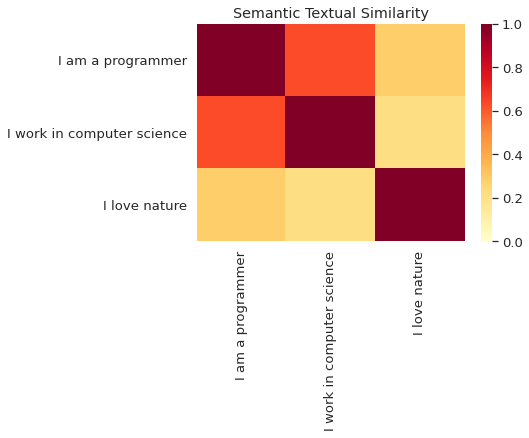

In [15]:
run_and_plot(phrases)

## Encoding Filters

In [16]:
filter_encodings = {
    'categories': {},
    'countries': {},
    'specials': {},
    'names': {},
}

In [17]:
for d in data:
    filter_encodings['categories'][d['category']] = 1

In [18]:
for d in data:
    filter_encodings['countries'][d['country']] = 1

In [19]:
specials = set()
for d in data:
    if d['special']:
        d_specials = d['special'].split(',')
        for special in d_specials:
            filter_encodings['specials'][special.strip()] = 1

In [20]:
for d in data:
    filter_encodings['names'][d['name']] = 1

In [21]:
filter_encodings['specials']

{'gluten-free': 1, 'vegan': 1, 'egg-free': 1, 'vegetarian': 1, 'dairy-free': 1}

In [22]:
for filter_type in filter_encodings:
    for key in filter_encodings[filter_type]:
        filter_encodings[filter_type][key] = model([key])[0]

In [23]:
filter_encodings['specials']['vegan']

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([-2.58551054e-02,  8.00631195e-03,  4.13219258e-02,  1.30952364e-02,
        5.21037243e-02, -5.61092608e-02, -1.06422221e-02, -1.71547066e-02,
        1.17509700e-02,  7.68037466e-03,  6.97503313e-02,  5.97540438e-02,
       -1.34337060e-02, -3.38575132e-02, -8.01808164e-02,  2.60044560e-02,
       -3.21492590e-02,  3.65319215e-02,  1.44102741e-02, -2.78957486e-02,
       -4.50368077e-02,  5.01818545e-02,  3.05113830e-02,  4.18683775e-02,
        1.70609914e-02,  7.48758242e-02, -3.77269462e-02, -4.78665493e-02,
        1.96442790e-02, -5.47615662e-02,  1.36650233e-02,  1.61892958e-02,
       -5.79380468e-02, -4.79701534e-02, -1.44848088e-02, -3.40487895e-04,
       -2.99146771e-02, -7.15540797e-02,  2.69205756e-02,  2.86074206e-02,
       -1.47995669e-02, -2.88707372e-02,  4.61353734e-02, -1.87604856e-02,
       -7.91729540e-02,  5.07128946e-02, -1.85098909e-02, -1.06367311e-02,
       -7.83717185e-02, -1.04527064e-02, -1.22589506

In [24]:
# save object to file
import pickle 
file_pi = open('server/data/filter_encodings.obj', 'wb') 
pickle.dump(filter_encodings, file_pi)

In [25]:
#file_pi2 = open('filter_encodings.obj', 'rb') 
#object_pi2 = pickle.load(file_pi2)

## Generate Phrases

In [26]:
skeleton_phrases = [
    '- Do you have [](order_item)?',
    '- I want [](order_item)',
    '- I\'m looking for [](order_item)',
    '- Yes, I want [](order_item)',
    '- I would like some [](order_item)',
]

In [27]:
import random

In [28]:
named_phrases = []
for k in filter_encodings['names']:
    choice = random.choice(skeleton_phrases)
    named_phrases.append(choice.replace('[]', "[{}]".format(k)))

In [29]:
for p in named_phrases:
    print(p)

- I want [Japanese ramen noodle soup](order_item)
- I want [Japanese rice/gohan](order_item)
- Do you have [Miso Soup](order_item)?
- Do you have [Smoked salmon & avocado sushi](order_item)?
- I would like some [Beetroot & avocado nori rolls with wasabi dipping sauce](order_item)
- I would like some [Gyoza](order_item)
- I want [Yaki udon](order_item)
- Do you have [Onigiri - Japanese Rice Balls](order_item)?
- I want [Mochi](order_item)
- I'm looking for [Vegan ramen](order_item)
- I would like some [Yakisoba - Japanese Stir Fry Noodles](order_item)
- I'm looking for [Quiche Lorraine](order_item)
- I'm looking for [White chocolate crème brûlée](order_item)
- Do you have [Caramel soufflés with caramel sauce](order_item)?
- I'm looking for [Macarons](order_item)
- Do you have [Ratatouille](order_item)?
- Yes, I want [Salade niçoise](order_item)
- Do you have [Pork cassoulet](order_item)?
- I'm looking for [Coq au vin](order_item)
- Yes, I want [Tarte Tatin](order_item)
- Do you have [Pi